In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

#Punto 4

Pruebe la aproximacion construida con al menos dos diferentes fuentes de datos de la inciativa de datos abiertos de Bogotá Nota: En cada caso debe explicar brevemente los datos seleccionados y pintar los puntos seleccionando una de las variables independientes.

##Primera fuente de datos - Malnutrición en población de 5 a 17 años en Bogotá

In [ ]:
# URL del archivo CSV
url = "https://raw.githubusercontent.com/danieeeel11/Datasets/main/SistemasInteligentes/osb_malnutricion5_17anos.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df1 = pd.read_csv(url, encoding="latin-1", delimiter=";")

# Mostrar las primeras filas del DataFrame
df1

,Cod,Área,Casos delgadez,Proporción delgadez,Casos exceso de peso,Proporción exceso de peso,Casos Retraso en talla,Proporción Retraso en talla,Total Poblacion,Año
0,1,Usaquén,102.0,"1,8",1.075,"19,4",626.000,"11,3",5.528,2007
1,2,Chapinero,9.0,"1,7",96.000,"17,8",64.000,"11,9",539.000,2007
2,3,Santa Fe,57.0,"2,5",415.000,18,340.000,"14,7",2.310,2007
3,4,San Cristóbal,103.0,"2,7",774.000,"20,3",579.000,"15,2",3.817,2007
4,5,Usme,248.0,"2,2",2.092,"18,2",2.019,"17,6",11.490,2007
...,...,...,...,...,...,...,...,...,...,...
369,18,Rafael Uribe Uribe,290.0,"2,8",2400.000,23,575.000,"5,5",10433.000,2023 pp ISEM
370,19,Ciudad Bolívar,780.0,"2,8",5971.000,"21,5",1791.000,"6,5",27737.000,2023 pp ISEM
371,20,Sumapaz,5.0,"2,3",65.000,"30,2",20.000,"9,3",215.000,2023 pp ISEM
372,21,Sin dato,509.0,"2,7",3996.000,"21,4",1155.000,"6,2",18699.000,2023 pp ISEM


### Explicacion de los datos

Origen de los datos: https://datosabiertos.bogota.gov.co/dataset/delgadez-y-exceso-de-peso-en-poblacion-de-5-a-17-anos-en-bogota-d-c

Para esta tabla de datos, se tiene una serie de datos recopilados desde el año 2007 al año 2023 acerca de diferentes casos de malnutricion en la población de 5 a 17 años en la ciudad de Bogotá.

Se tienen las siguientes columnas:
* Cod	= Numero o codigo referente a la localidad de Bogotá
* Área = Nombre de la localidad de Bogotá
* Casos delgadez = Numero de casos por delgadez en la localidad
* Proporción delgadez	= Proporcion de casos por delgadez en la localidad
* Casos exceso de peso = Numero de casos por exceso de peso en la localidad
* Proporción exceso de peso = Proporcion de casos por exceso de peso en la localidad
* Casos Retraso en talla = Numero de casos por retraso en talla en la localidad
* Proporción Retraso en talla	= Proporcion de casos por retraso en talla en la localidad
* Total Poblacion	= Total poblacion por localidad
* Año = Año de la recoleccion de los datos

Para fines del proceso ha realizar, se van a seleccionar las columnas "Año", "Proporción delgadez",	"Proporción exceso de peso" y "Proporción Retraso en talla". Esto debido a que vamos visualizar el comportamiento de la proporcion de cada tipo de malnutricion en promedio por cada año registrado.

### Limpieza de datos

Limpiar valores en columna "Año"

In [ ]:
# Modificar los valores de la columna 'Año'
for i, valor in enumerate(df1['Año']):
    if ' pp' in valor:
        df1.at[i, 'Año'] = valor.replace(' pp ISEM', '')

In [ ]:
df1['Año'] = df1['Año'].astype(int)

Limpieza valores en columnas de proporcion

In [ ]:
df1['Proporción delgadez'] = df1['Proporción delgadez'].str.replace(',', '.')
df1['Proporción exceso de peso'] = df1['Proporción exceso de peso'].str.replace(',', '.')
df1['Proporción Retraso en talla '] = df1['Proporción Retraso en talla '].str.replace(',', '.')

In [ ]:
df1['Proporción delgadez'] = df1['Proporción delgadez'].astype(float)
df1['Proporción exceso de peso'] = df1['Proporción exceso de peso'].astype(float)
df1['Proporción Retraso en talla '] = df1['Proporción Retraso en talla '].astype(float)

Corroborar tipos de dato

In [ ]:
print(df1.dtypes)

Cod                               int64
Área                             object
Casos delgadez                  float64
Proporción delgadez             float64
Casos exceso de peso            float64
Proporción exceso de peso       float64
Casos Retraso en talla          float64
Proporción Retraso en talla     float64
Total Poblacion                 float64
Año                               int64
dtype: object


In [ ]:
df1

,Cod,Área,Casos delgadez,Proporción delgadez,Casos exceso de peso,Proporción exceso de peso,Casos Retraso en talla,Proporción Retraso en talla,Total Poblacion,Año
0,1,Usaquén,102.0,1.8,1.075,19.4,626.000,11.3,5.528,2007
1,2,Chapinero,9.0,1.7,96.000,17.8,64.000,11.9,539.000,2007
2,3,Santa Fe,57.0,2.5,415.000,18.0,340.000,14.7,2.310,2007
3,4,San Cristóbal,103.0,2.7,774.000,20.3,579.000,15.2,3.817,2007
4,5,Usme,248.0,2.2,2.092,18.2,2.019,17.6,11.490,2007
...,...,...,...,...,...,...,...,...,...,...
369,18,Rafael Uribe Uribe,290.0,2.8,2400.000,23.0,575.000,5.5,10433.000,2023
370,19,Ciudad Bolívar,780.0,2.8,5971.000,21.5,1791.000,6.5,27737.000,2023
371,20,Sumapaz,5.0,2.3,65.000,30.2,20.000,9.3,215.000,2023
372,21,Sin dato,509.0,2.7,3996.000,21.4,1155.000,6.2,18699.000,2023


### Punto a

Seleccione dos columnas numéricas del data set seleccionado y pruebe la regresión lineal para dos variables

In [ ]:
# Agrupar por año y calcular la suma y el promedio de la columna 'Proporcion'
df1_f = df1.groupby('Año')['Proporción exceso de peso'].agg(['mean'])

# Resetear el índice para que 'Año' sea una columna aparte
df1_f = df1_f.reset_index()

# Renombrar las columnas resultantes
df1_f = df1_f.rename(columns={'mean': 'Promedio Proporción exceso de peso'})

In [ ]:
df1_f

,Año,Promedio Proporción exceso de peso
0,2007,19.590909
1,2008,18.200000
2,2009,18.790909
3,2010,20.568182
4,2011,20.927273
5,2012,21.927273
6,2013,22.390909
7,2014,23.250000
8,2015,22.336364
9,2016,25.204545


In [ ]:
lista_df1_1 = df1_f.values.tolist()

print(lista_df1_1)

[[2007.0, 19.59090909090909], [2008.0, 18.2], [2009.0, 18.79090909090909], [2010.0, 20.568181818181817], [2011.0, 20.927272727272726], [2012.0, 21.927272727272726], [2013.0, 22.39090909090909], [2014.0, 23.25], [2015.0, 22.336363636363636], [2016.0, 25.204545454545453], [2017.0, 27.472727272727273], [2018.0, 27.05], [2019.0, 22.799999999999997], [2020.0, 29.177272727272726], [2021.0, 29.913636363636364], [2022.0, 24.718181818181815], [2023.0, 22.554545454545455]]


### Lasso

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

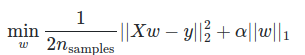

In [ ]:
x_values = []
y_values = []

for item in lista_df1_1:
    x_values.append(item[0])
    y_values.append(item[1])

# Convertir a matrices 2D
x_values = np.array(x_values).reshape(-1, 1)
y_values = np.array(y_values)

In [ ]:
X = x_values
y = y_values

# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print("R2 score:", score)

In [ ]:
# Definir una lista de alfas
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# Inicializar una lista para almacenar los coeficientes
coefs = []

# Ajustar el modelo Ridge para cada valor de alfa y guardar los coeficientes
for alpha in alphas:
    # Creamos el modelo Lasso
    lasso = Lasso(alpha=alpha)  # alpha es el parámetro de regularización

    # Ajustamos el modelo a los datos de entrenamiento
    lasso.fit(X_train_scaled, y_train)
    # Evaluamos el rendimiento del modelo en el conjunto de prueba
    score = lasso.score(X_test_scaled, y_test)
    coefs.append([alpha, score])

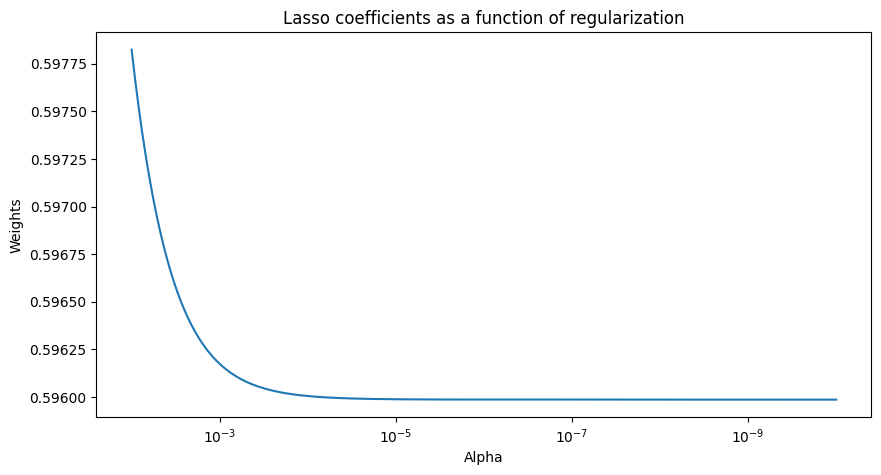

In [ ]:
# Graficar los coeficientes en función de los valores de alfa
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, np.array([x[1] for x in coefs]))
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Lasso coefficients as a function of regularization")
plt.axis("tight")
plt.show()

In [ ]:
mejor_coef = min( np.array([x[1] for x in coefs]) )
mejor_alpha = 0
for i in coefs:
  if i[1] == mejor_coef:
    mejor_alpha = i[0]

In [ ]:
mejor_alpha

1e-10

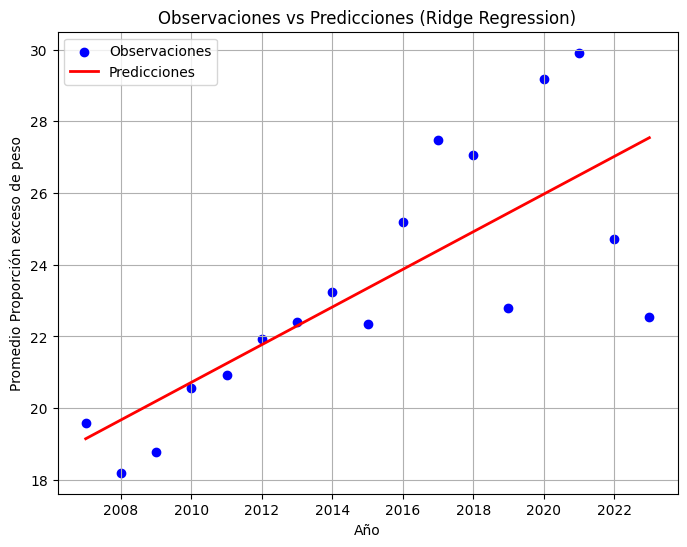

In [ ]:
# Ajustar el modelo Ridge con el mejor alpha encontrado
lasso_reg = Lasso(alpha=mejor_alpha)
lasso_reg.fit(X, y)

# Predicciones del modelo en todo el rango de datos
y_pred = lasso_reg.predict(X)

# Graficar las observaciones reales y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Observaciones vs Predicciones (Lasso Regression)')
plt.xlabel('Año')
plt.ylabel('Promedio Proporción exceso de peso')
plt.legend()
plt.grid(True)
plt.show()